In [1]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)
from moviepy.editor import *

3.3.1


In [2]:
path_for_videos = '../dataFolders/ManuallyAnnotatedVideos'
videoList = glob.glob(path_for_videos + '/*.mp4')
# videoList

In [3]:
path_for_manualAnnotation = "G:\My Drive\Tom-Tanvi\Shared With Bing,Tom and Tanvi\Moth Annotations\Tip Manual Digitization"
path_for_DLCAnnotation = 'G:\My Drive\Tom-Tanvi\Shared With Bing,Tom and Tanvi\Video Analysis\DeepLabCut-ImageAnalysis\\take5\outputFromDLC\VideoResults'

In [4]:
# get the compiled manually Tracked Data
manual_compiled = pd.read_csv('../dataFolders/compiledTrackData.csv')

In [261]:
def GetRelevantTrackingData(fname):
    DLC_track = glob.glob(path_for_DLCAnnotation + '\\'+ fname + 'DeepCut_' +  '*.h5')[0]
    temp = pd.read_hdf(DLC_track)
    DLC = temp.loc[slice(None),(slice(None),'proboscisTip')]
    dlc_x = DLC.xs(('proboscisTip', 'x'), 
                   level = ('bodyparts', 'coords'), axis = 1).values
    dlc_y = DLC.xs(('proboscisTip', 'y'), 
                   level = ('bodyparts', 'coords'), axis = 1).values
    dlc_likelihood = DLC.xs(('proboscisTip', 'likelihood'), 
                   level = ('bodyparts', 'coords'), axis = 1).values

    manual_track = pd.read_csv(path_for_manualAnnotation + '//DLTdv6_data_' + fname + 'xypts.csv')
    
    return(dlc_x, dlc_y, dlc_likelihood, manual_track)

In [258]:
names = ['c-10_m11']

for fname in names:
    
#     _, name = os.path.split(video)
    
    DLC_track = glob.glob(path_for_DLCAnnotation + '\\'+ fname + 'DeepCut_' +  '*.h5')[0]
    temp = pd.read_hdf(DLC_track)
    DLC = temp.loc[slice(None),(slice(None),'proboscisTip')]
    dlc_x = DLC.xs(('proboscisTip', 'x'), 
                   level = ('bodyparts', 'coords'), axis = 1).values
    dlc_y = DLC.xs(('proboscisTip', 'y'), 
                   level = ('bodyparts', 'coords'), axis = 1).values
    dlc_likelihood = DLC.xs(('proboscisTip', 'likelihood'), 
                   level = ('bodyparts', 'coords'), axis = 1).values
    
    manual_track = pd.read_csv(path_for_manualAnnotation + '//DLTdv6_data_' + fname + 'xypts.csv')

In [259]:
fstart = 9860 
fstop = 11280
# dlc
manual_x = manual_track.loc[fstart:fstop, 'pt4_cam1_X'].values
manual_y = manual_track.loc[fstart:fstop, 'pt4_cam1_Y'].values
manual_y = 488 - manual_y

In [260]:
len(test_x), len(manual_x)

(1421, 1421)

In [111]:
idx = pd.IndexSlice
test_x = DLC.loc[idx[fstart:fstop], idx[:,:,'x']].values
test_y = DLC.loc[idx[fstart:fstop], idx[:,:,'y']].values

In [170]:
# export figure path = 
export_fig_path = '../dataFolders/Figures/Tracking Errors/c10_m11'

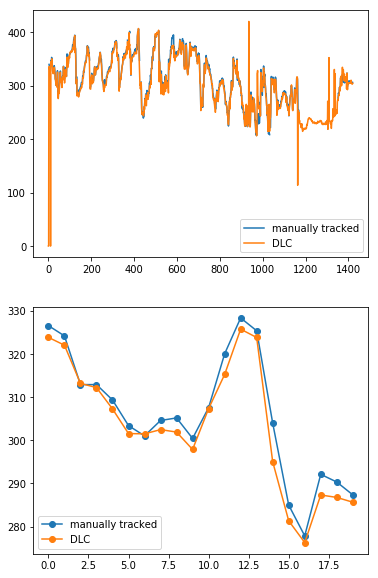

In [233]:
fig, ax = plt.subplots(2,1, figsize = (6,10))

ax[0].plot(manual_x, label = 'manually tracked')
ax[0].plot(test, label = 'DLC')
ax[0].legend()
# plt.show()

ax[1].plot(manual_x[30:50], marker = 'o', label = 'manually tracked')
ax[1].plot(test[30:50], marker = 'o', label = 'DLC')
ax[1].legend()
plt.show()

fig.savefig(export_fig_path + '\\xDirection.png')

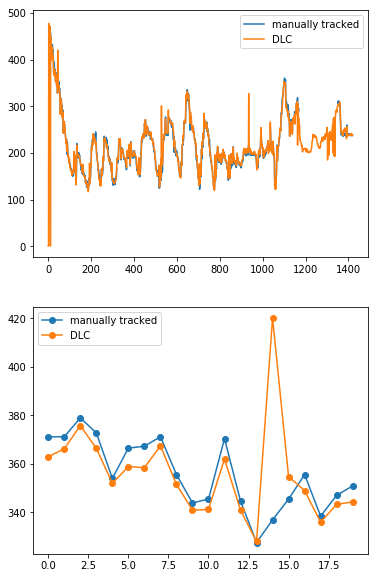

In [234]:
fig, ax = plt.subplots(2,1, figsize = (6,10))

ax[0].plot(manual_y, label = 'manually tracked')
ax[0].plot(test_y, label = 'DLC')
ax[0].legend()

ax[1].plot(manual_y[30:50], marker = 'o', label = 'manually tracked')
ax[1].plot(test_y[30:50], marker = 'o', label = 'DLC')
ax[1].legend()
plt.show()

fig.savefig(export_fig_path + '\\yDirection.png')

In [114]:
from scipy.spatial.distance import pdist

er = []
for idx in range(len(test_x)-1):
    X = np.asarray([[manual_x[idx], manual_y[idx]], 
                     [test_x[idx][0], test_y[idx][0]]])
    temp_er = pdist(X,metric = 'euclidean')
    er.append(temp_er[0])

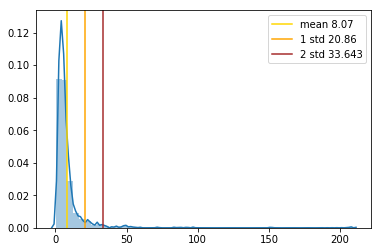

In [206]:
import seaborn as sns

er = np.asarray(er)
sns.distplot(er[~np.isnan(er)])
plt.axvline(x = df.rmse.mean(), color = 'gold', 
            label = 'mean %.2f' %df.rmse.mean())
plt.axvline(x = df.rmse.mean() + df.rmse.std(ddof = 0), color = 'orange', 
            label = '1 std %.2f' % (df.rmse.mean() + df.rmse.std(ddof = 0)))
plt.axvline(x = df.rmse.mean() + 2*df.rmse.std(ddof = 0), color = 'brown', 
            label = '2 std %0.3f' % (df.rmse.mean() + 2*df.rmse.std(ddof = 0)))
plt.legend()

plt.savefig(export_fig_path + '\\rmse.png')

In [132]:
df = pd.DataFrame(data = er, columns = ['rmse'])
df['zscore'] = (df.rmse - df.rmse.mean())/df.rmse.std(ddof = 0)

In [255]:
len(df[df.zscore < bla])/len(df.zscore)

0.7732394366197183

In [256]:
fraction_included = []
for bla in [0.5, 1, 2, 3]:
    ff = len(df[df.zscore < bla])/len(df.zscore)
#     ff = len(df[(df.zscore < bla) & (df.zscore.notna())])/len(df[df.zscore.notna()])
    fraction_included.append(ff)

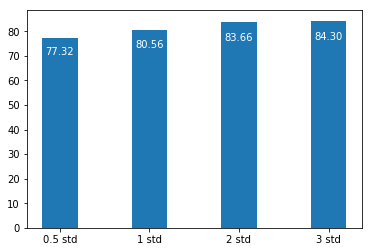

In [257]:
ind = np.arange(len(fraction_included))

rect = np.asarray(fraction_included)*100

plt.bar(ind, rect, width = 0.4)
plt.xticks(ind, ['0.5 std', '1 std', '2 std', '3 std'])
for ind, rect in zip(ind, rect):
    plt.text(ind, 0.90*rect, '%.2f' %rect, 
        ha = 'center', va = 'bottom', 
            color = 'white')

plt.savefig(export_fig_path + '\\fractionIncuded_withNaNs.png')

In [241]:
fraction_included

[0.9022185702547247,
 0.9400164338537387,
 0.9761709120788825,
 0.9835661462612982]

In [154]:
# alternate way to slice:
# 1) 
# idx = pd.IndexSlice
# DLC = temp.loc[idx[:], idx[:, 'proboscisTip']]
 
# 2) xs
# DLC = temp.xs(('proboscisTip'), level = ('bodyparts'), axis = 1)


In [ ]:
    
#     plt.plot(manual_x[:30], 'o-', color = 'cyan')
#     plt.plot(dlc_x[:30], 'o-', color = 'orange')
#     plt.ylim([0,648])
#     plt.show()

#     plt.plot(manual_y[:30], 'o-', color = 'cyan')
#     plt.plot(dlc_y[:30], 'o-', color = 'orange')
#     plt.ylim([0,488])
#     plt.show()
    
#     plt.plot(manual_x[:30], manual_y[:30] , 'o-', color = 'cyan')
#     plt.plot(dlc_x[:30], dlc_y[:30], 'o-', color = 'orange')
#     plt.xlim([0, 648])
#     plt.ylim([0,488])
#     plt.show()

In [96]:
Error_Df = pd.DataFrame(data = None, columns = ('name', 'manual_x', 'manual_y', 'DLC_x',
                                               'DLC_y', 'DLC_likelihood', 'error', 'RMSE'))

for video in videoList:
    
    _, name = os.path.split(video)
    
    DLC_track = glob.glob(path_for_DLCAnnotation + '\\'+ name[:-4] + '*.h5')[0]
    temp = pd.read_hdf(DLC_track)
    DLC = temp.loc[slice(None),(slice(None),'proboscisTip')]
    dlc_x = DLC.xs(('proboscisTip', 'x'), 
                   level = ('bodyparts', 'coords'), axis = 1).values
    dlc_y = DLC.xs(('proboscisTip', 'y'), 
                   level = ('bodyparts', 'coords'), axis = 1).values
    dlc_likelihood = DLC.xs(('proboscisTip', 'likelihood'), 
                   level = ('bodyparts', 'coords'), axis = 1).values
    
    if 'first_trial' in name:
        manual_x = manual_compiled[(manual_compiled.name == name[:-16]) & 
                                   (manual_compiled.trial == '0')].xpts.values
        manual_y = manual_compiled[(manual_compiled.name == name[:-16]) & 
                                   (manual_compiled.trial == '0')].ypts.values
        # correct for matlab and python y axis inversion
        
    else:
        manual_x = manual_compiled[(manual_compiled.name == name[:-15]) & 
                                   (manual_compiled.trial == 'last')].xpts.values
        manual_y = manual_compiled[(manual_compiled.name == name[:-15]) & 
                                   (manual_compiled.trial == 'last')].ypts.values
    
    # Adjust for matlab and python image default
    manual_y = 488-manual_y
    
    #Adjust for length mismatch
    if len(manual_x) != len(DLC):
        manual_x = manual_x[1:]
        manual_y = manual_y[1:]
    
    print(len(manual_x)-len(DLC), name)
    
    # append the values to dataframe
#     temp_df = pd.DataFrame(data = None, index = 
#                            columns = ('name', 'manual_x', 'manual_y', 'DLC_x',
#                                                'DLC_y', 'DLC_likelihood', 'error', 'RMSE'))
  
    n = [name]*(len(manual_x))
    df1 = pd.Series(data = n, name = 'name', dtype = 'str')
    df2 = pd.Series(data = dlc_x.squeeze(), name = 'DLC_x', dtype = 'int64')
    df3 = pd.Series(data = dlc_y.squeeze(), name = 'DLC_y', dtype = 'int64')
    df4 = pd.Series(data = dlc_likelihood.squeeze(), name = 'DLC_likelihood', dtype = 'float64')
    df5 = pd.Series(data = manual_x, name = 'manual_x', dtype = 'int64')
    df6 = pd.Series(data = manual_y, name = 'manual_y', dtype = 'int64')
    df7 = pd.Series(data = None, name = 'error')
    df8 = pd.Series(data = None, name = 'RMSE')
    temp_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis = 1)
    # temp.DLC_likelihood = dlc_likelihood
#     temp.error = er
    
    Error_Df = Error_Df.append(temp_df, ignore_index=True)

0 c-10_m11_first_trial.mp4
0 c-10_m11_last_trial.mp4
0 c-10_m3_first_trial.mp4
5 c-10_m3_last_trial.mp4
0 c-10_m6_first_trial.mp4
0 c-10_m6_last_trial.mp4
0 c-1_m13_first_trial.mp4
0 c-1_m13_last_trial.mp4
0 c-1_m2_first_trial.mp4
0 c-1_m2_last_trial.mp4
0 c-1_m6_first_trial.mp4
0 c-1_m6_last_trial.mp4
0 c-2_m11_first_trial.mp4
0 c-2_m11_last_trial.mp4
0 c-2_m1_first_trial.mp4
0 c-2_m1_last_trial.mp4
0 c-2_m5_first_trial.mp4
0 c-2_m5_last_trial.mp4
0 c-3_m10_first_trial.mp4
0 c-3_m10_last_trial.mp4
0 c-3_m1_first_trial.mp4
0 c-3_m1_last_trial.mp4
0 c-3_m6_first_trial.mp4
0 c-3_m6_last_trial.mp4


In [97]:
from scipy.spatial.distance import pdist

er = []
for idx in range(len(Error_Df.DLC_x)):
    X = np.asarray([[Error_Df.loc[idx,'manual_y'],
                   Error_Df.loc[idx,'manual_y']], 
                   [Error_Df.loc[idx, 'DLC_x'],
                    Error_Df.loc[idx, 'DLC_y']]])
    temp_er = pdist(X,metric = 'euclidean')
    er.append(temp_er[0])

Error_Df.error = er

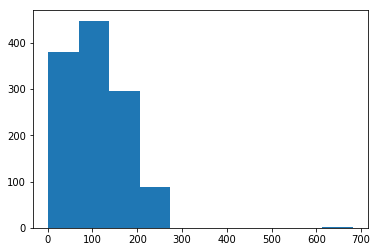

In [101]:
names = ['c-10_m11_first_trial.mp4']
for name in names:
    er = Error_Df.loc[Error_Df.name == name, 'error'].values
    plt.hist(er[~np.isnan(er)])
    plt.show()